# This project focuses on using Analytics to drive Employee welness and incentives.

# **Objectives**
-   Provide a list of Healthy Individuals & low Abbsenteeism for our healthy bonus program - Total budegt $1000 USD

-   Calculate a wage increase or annual compensation for Non-smokers for
    - Insurance budget  of $983,221 for all non-smokers

-   create a Dashboard for HR to understand Absenteeism at work based on approved wireframe.(This will be completed using PowerBI)
## ** Data Process**
-  This code selects all data in the absenteeism table as 'a', then joined by the compensation as 'b' table using the ID column on both tables.
    -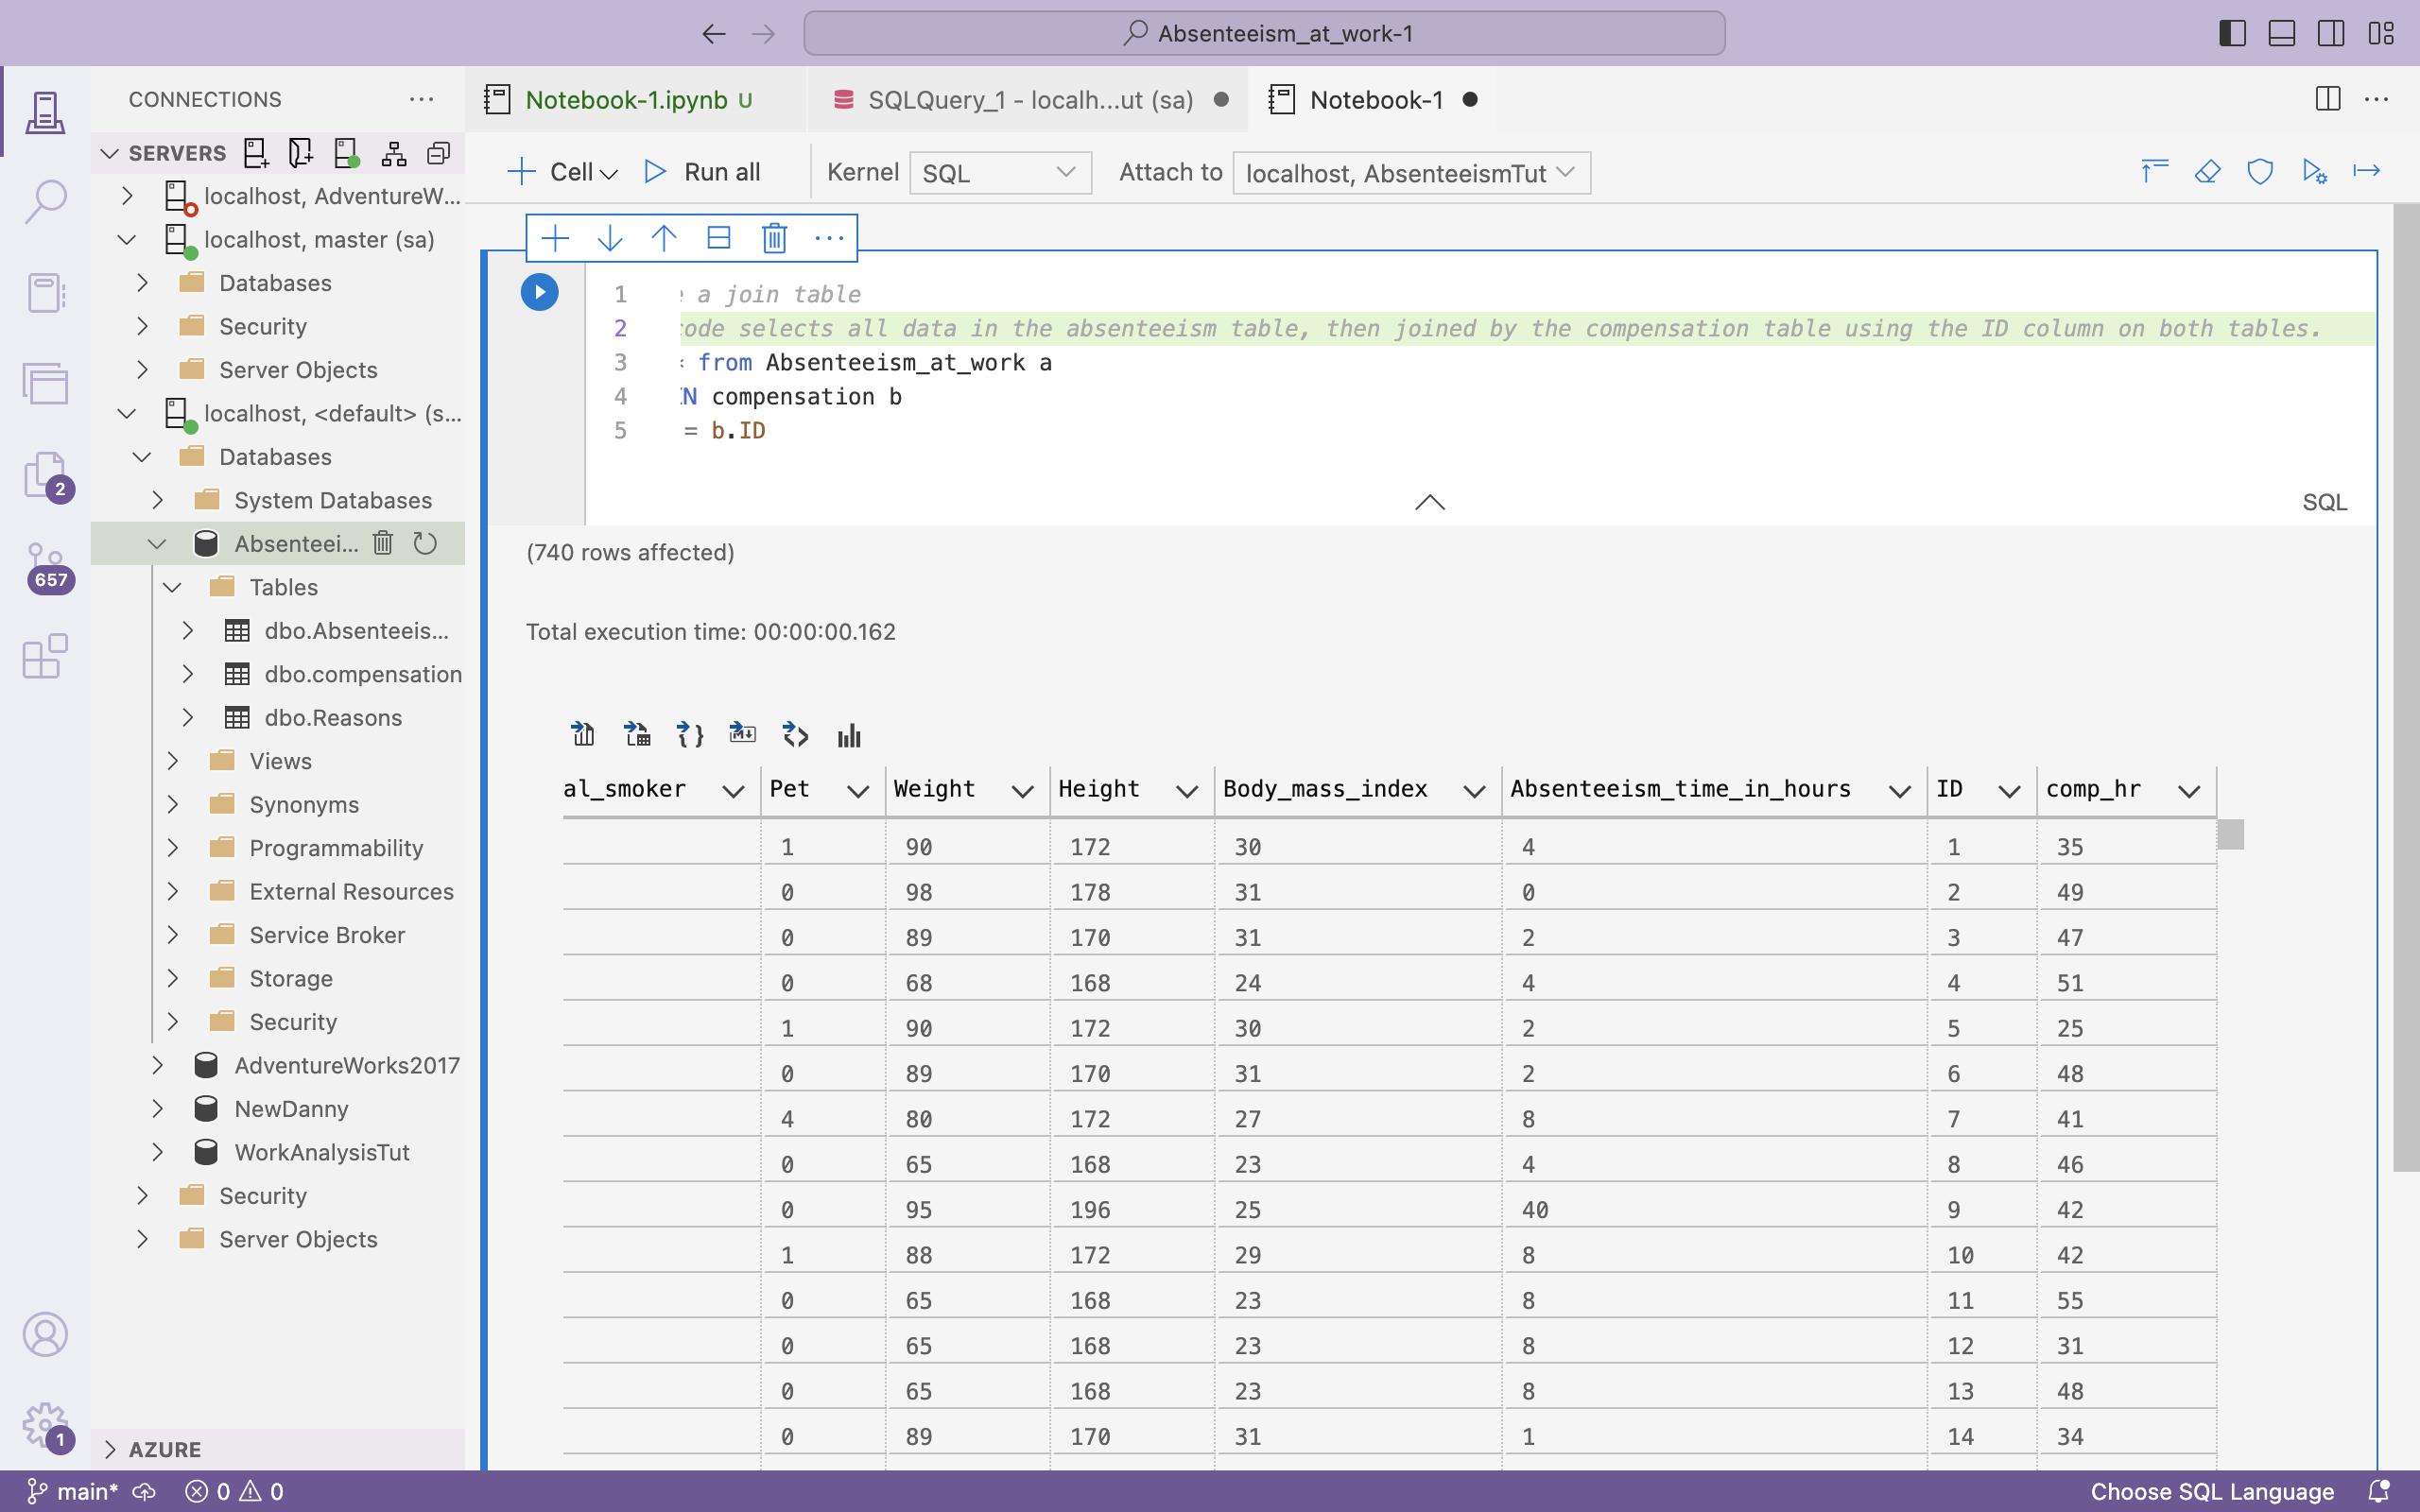
- Also joined the Reasons table as 'c' using "rfa" column on 'a' and number column on 'c'.
    -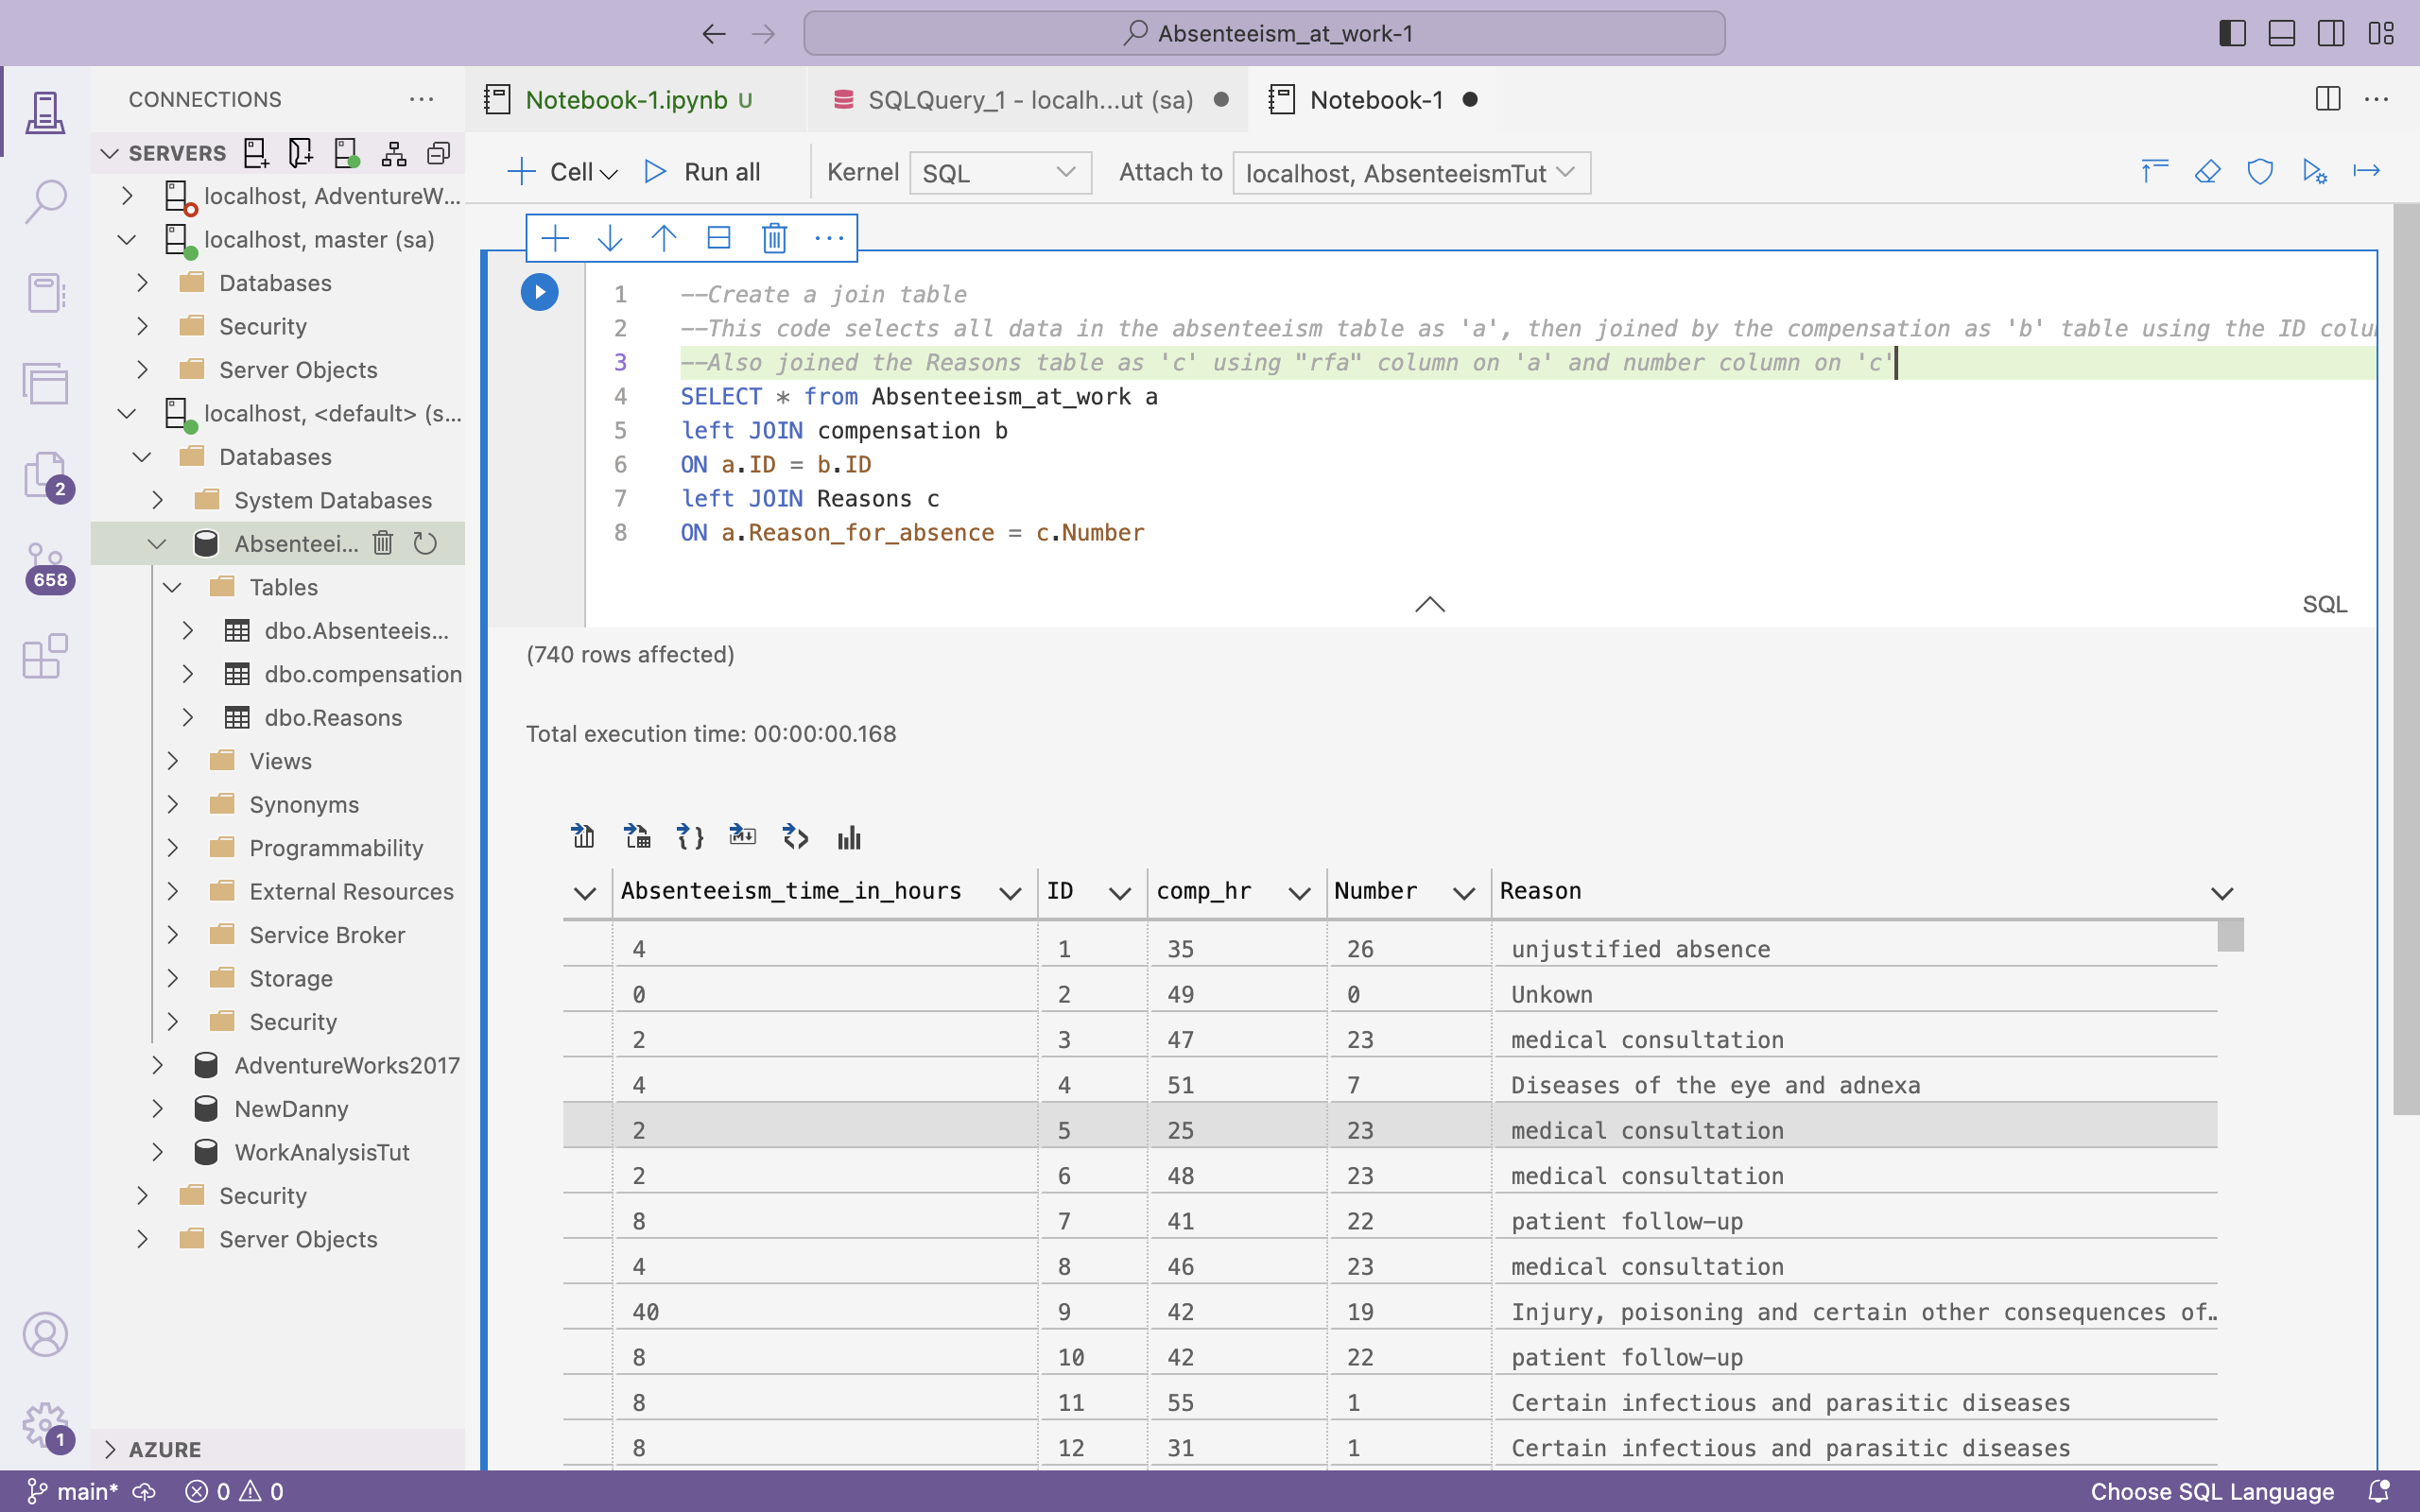

 ### Find the healthiest Employee for the bonus
-   this query selects some columns out of the entire table by using the WHERE function to filter the columns that are/arent needed, Also includes a sub-query that returns the average of a column.
    -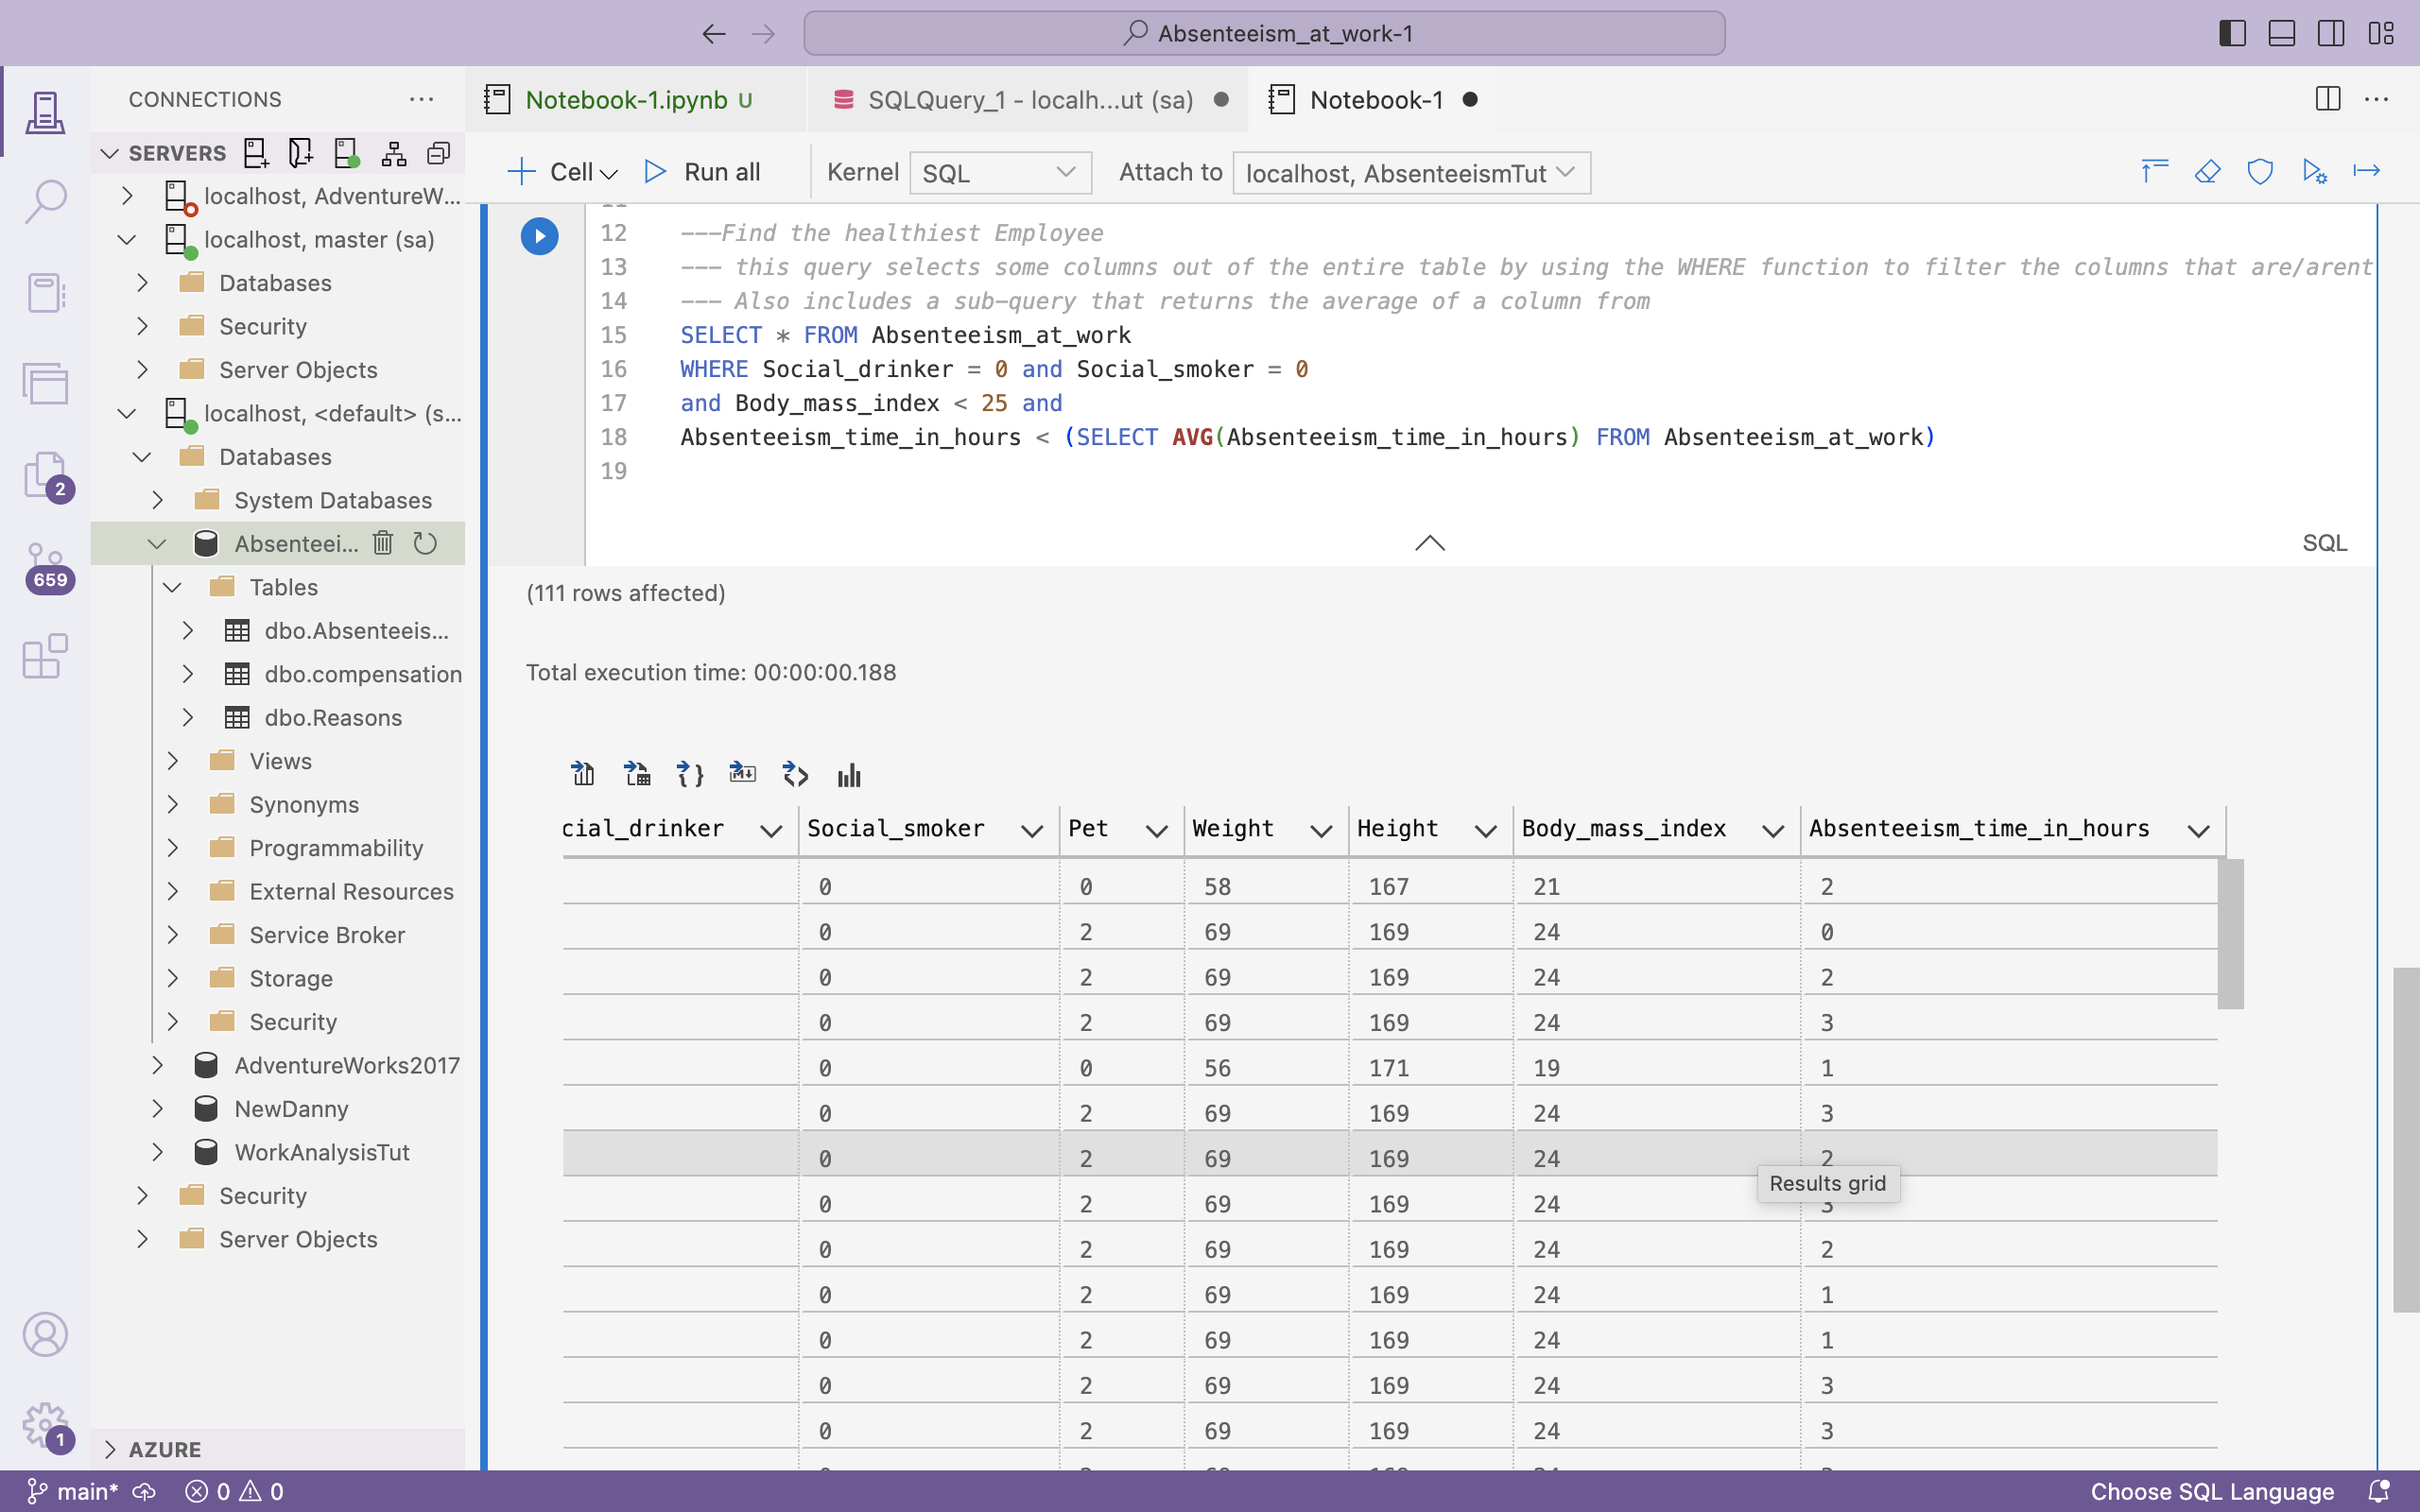

###  Compensation rate increase for non-smokers
-   This query counts the rows of non-smokers and returns a single value
    -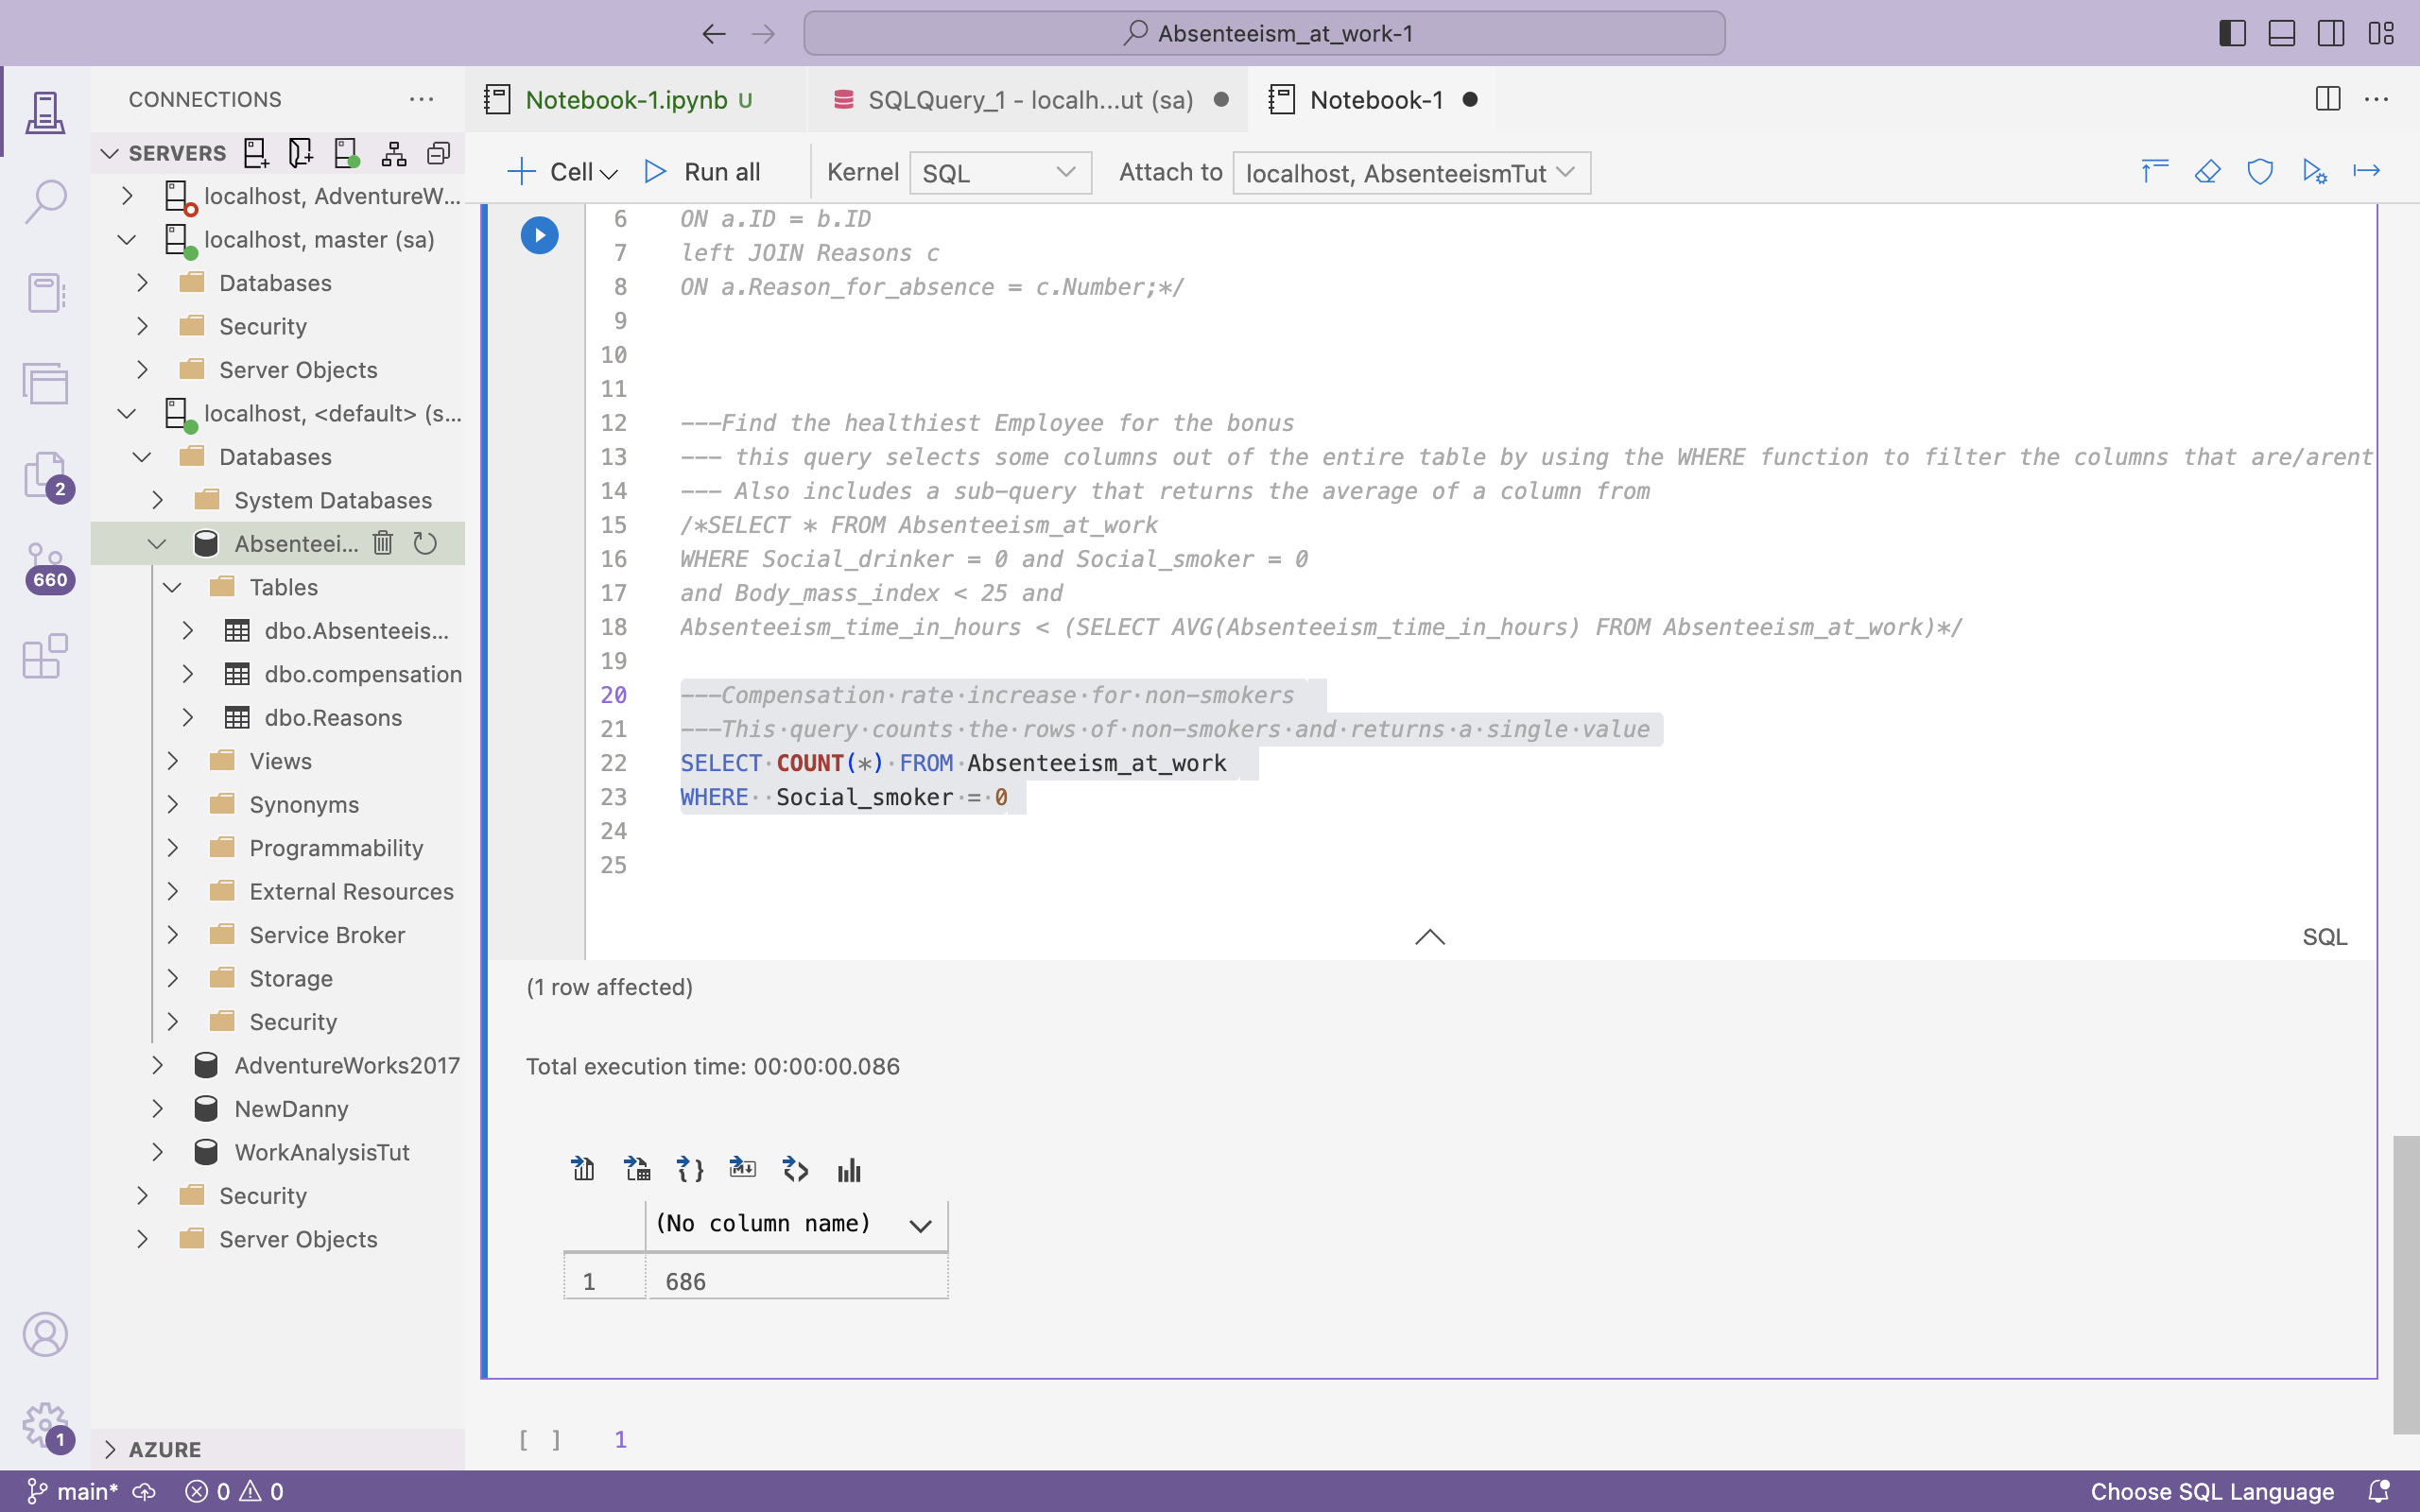

###   Sorting and creeating categories in some ccolumns
-   In this query,we selected only the columns needed for this analysis by sorting them using a cconditional expression statement. -   The CASE keyword allows us to perform conditional logic within a query .
-   The END keyword is used to signify the end of the CASE expression.
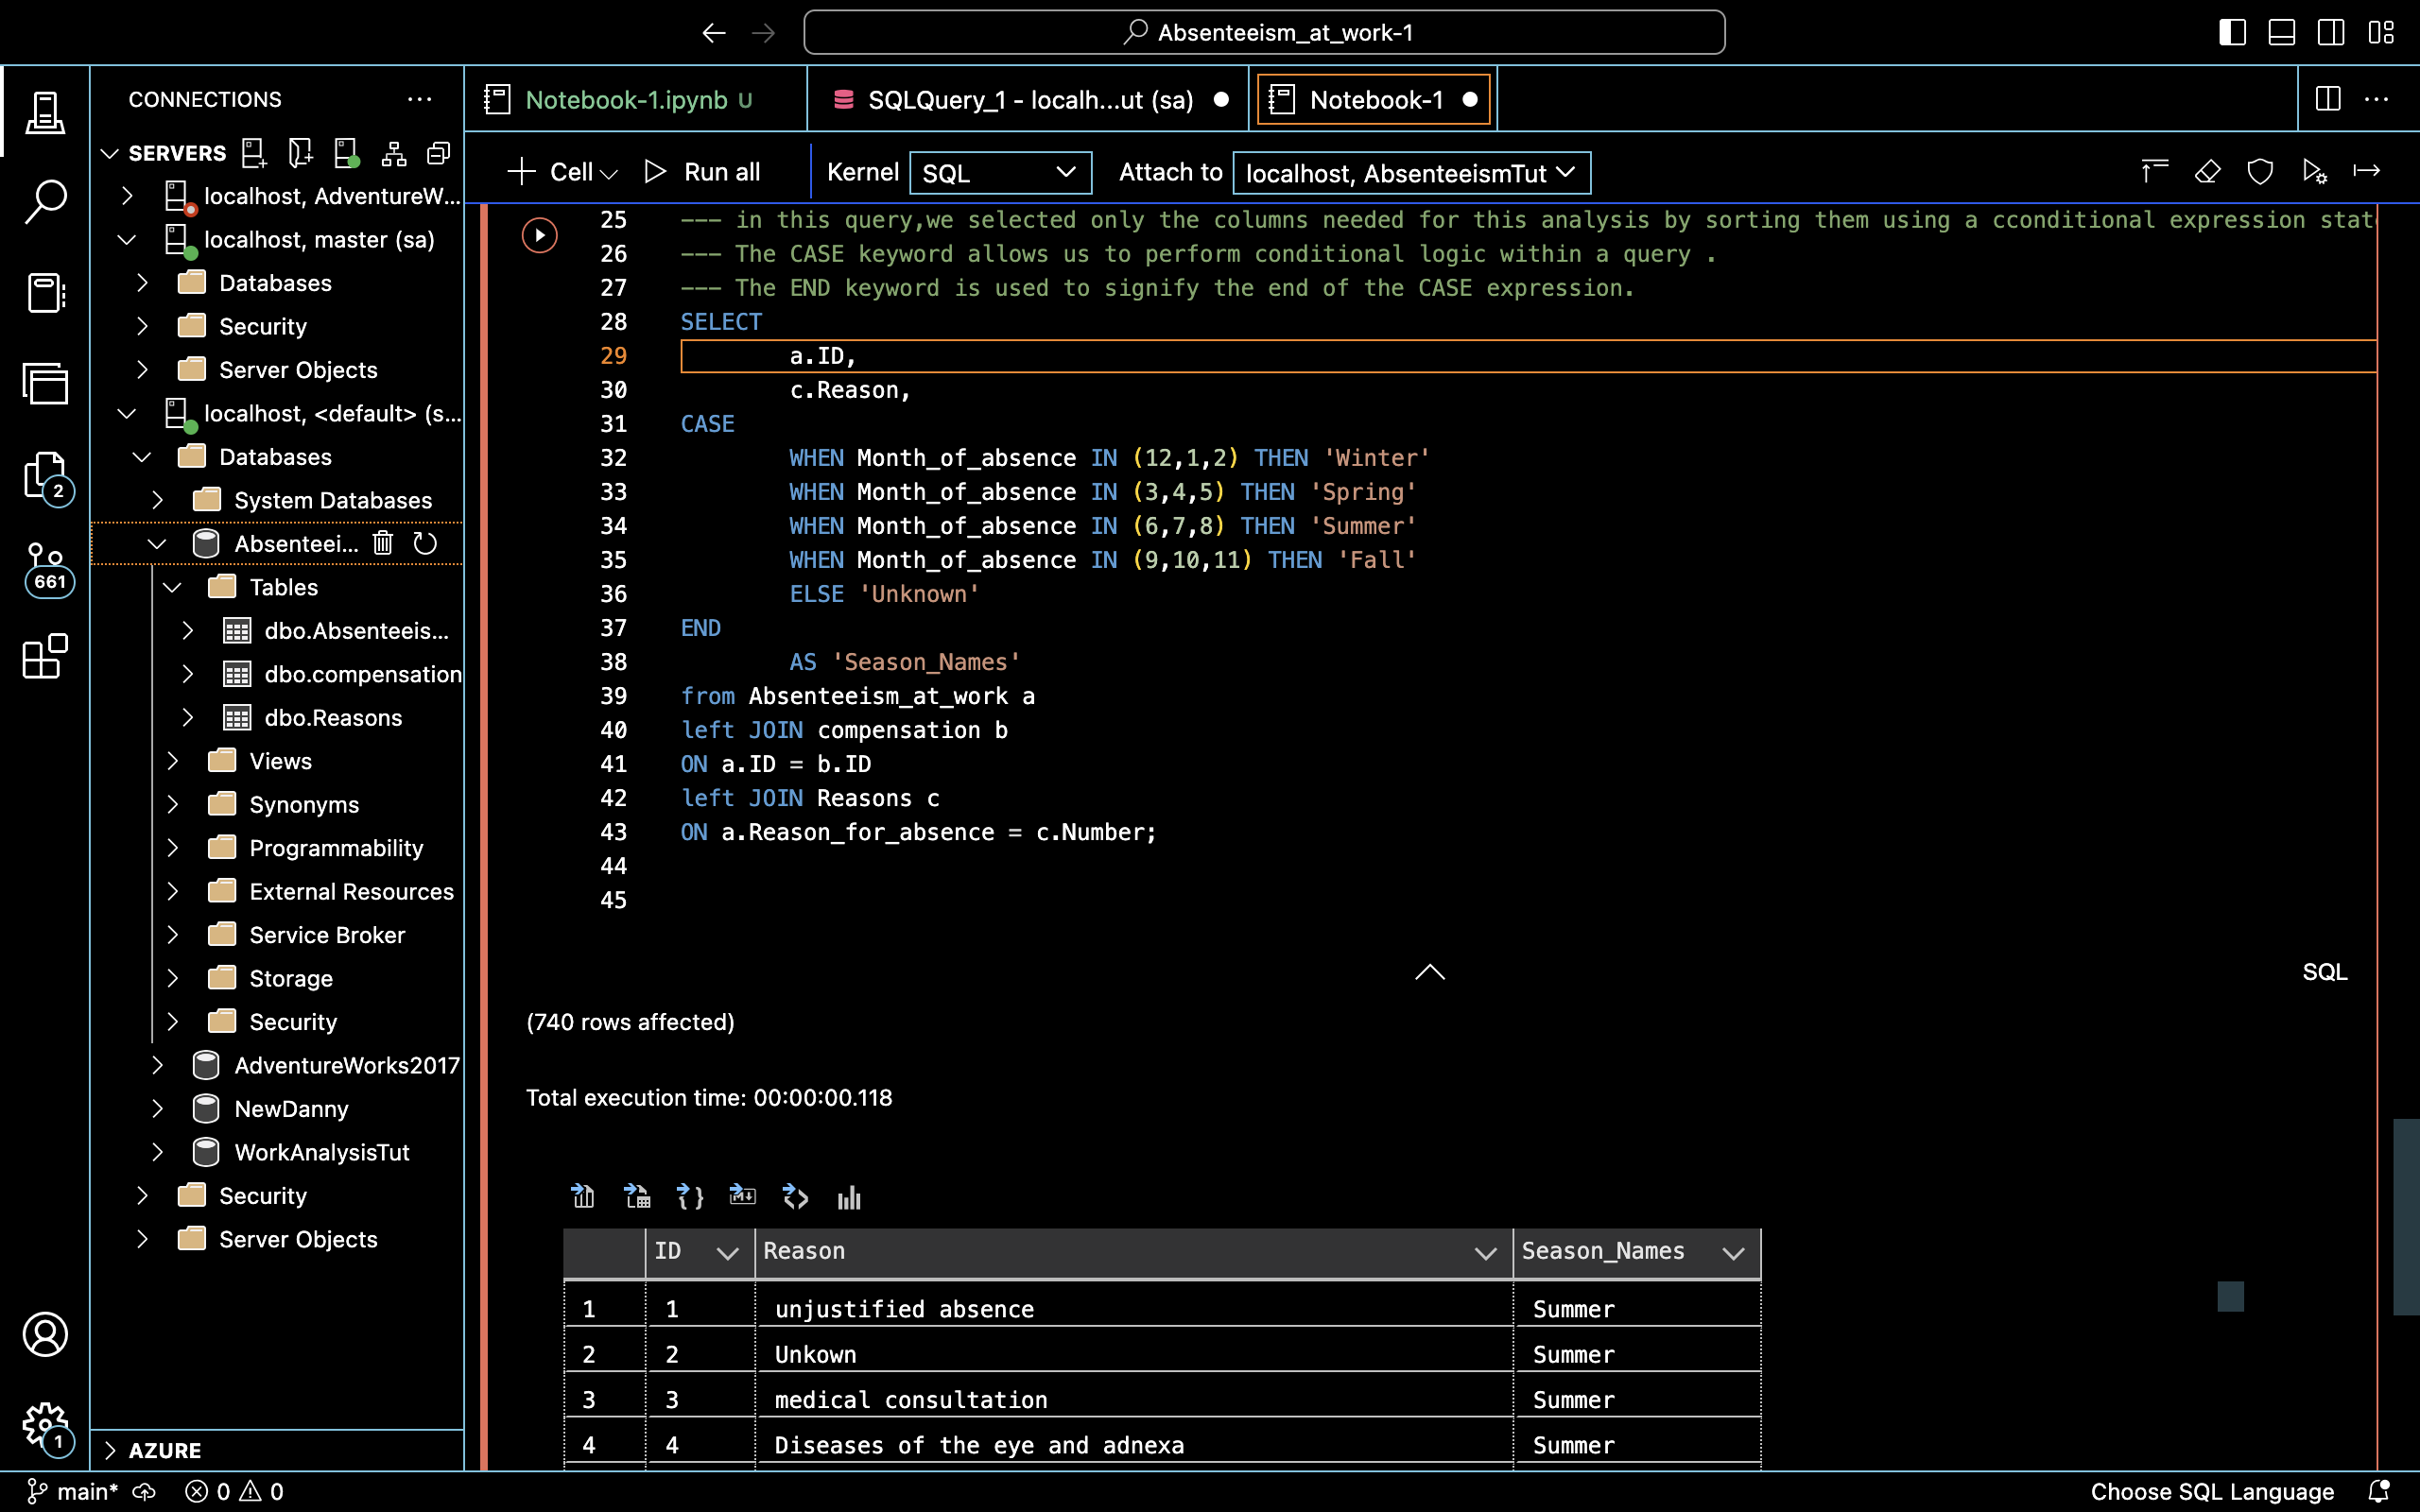

In [1]:
/*--Create a join table
--This code selects all data in the absenteeism table as 'a', then joined by the compensation as 'b' table using the ID column on both tables.
--Also joined the Reasons table as 'c' using "rfa" column on 'a' and number column on 'c'
SELECT * from Absenteeism_at_work a
left JOIN compensation b 
ON a.ID = b.ID
left JOIN Reasons c 
ON a.Reason_for_absence = c.Number;

---Find the healthiest Employee for the bonus
--- this query selects some columns out of the entire table by using the WHERE function to filter the columns that are/arent needed.
--- Also includes a sub-query that returns the average of a column from 
SELECT * ,
    CASE
             WHEN Social_smoker = 0 THEN 'Non-smoker'
            WHEN Social_smoker = 1 THEN 'Smoker'
            ELSE 'Unknown'
    END 
            AS 'Smoker_category',
    
    CASE
            WHEN Social_drinker = 0 THEN 'Non-Drinker'
            WHEN Social_drinker = 1 THEN 'Drinker'
            ELSE 'Unknown'
    END 
            AS 'Drinker_category'
FROM Absenteeism_at_work
WHERE Social_drinker = 0 and Social_smoker = 0
and Body_mass_index < 25 and 
Absenteeism_time_in_hours < (SELECT AVG(Absenteeism_time_in_hours) FROM Absenteeism_at_work)

---Compensation rate increase for non-smokers|budget @ $983,221|$0.6891 increase/h|$1,433.3/year for each employee      
---This query counts the rows of non-smokers and returns a single value with a new column name
SELECT COUNT(*) AS nonsmokers FROM Absenteeism_at_work 
WHERE  Social_smoker = 0


--- Optimmized Query---

SELECT
        a.ID,
        c.Reason,
        Month_of_absence,
        Body_mass_index,
    CASE
        WHEN Body_mass_index  < 18.5 THEN 'Underweight'
        WHEN Body_mass_index BETWEEN 18.5 and 25 THEN 'Healthy weight'
        WHEN Body_mass_index BETWEEN 25 and 30 THEN 'Overweight'
        WHEN Body_mass_index  > 18.5 THEN 'Obese'
        ELSE 'Unknown'
    END 
        AS 'BMI_Category',    
    CASE
        WHEN Month_of_absence IN (12,1,2) THEN 'Winter'
        WHEN Month_of_absence IN (3,4,5) THEN 'Spring'
        WHEN Month_of_absence IN (6,7,8) THEN 'Summer'
        WHEN Month_of_absence IN (9,10,11) THEN 'Fall'
        ELSE 'Unknown'
    END 
        AS 'Season_Names',
Day_of_the_week,
Transportation_expense,
Pet,
Age,
Work_load_Average_day,
Absenteeism_time_in_hours,
Distance_from_Residence_to_Work,
Seasons,
Service_time,
Hit_target,
Disciplinary_failure,
Education,
son,
Social_drinker,
CASE
            WHEN Social_drinker = 0 THEN 'Non-Drinker'
            WHEN Social_drinker = 1 THEN 'Drinker'
            ELSE 'Unknown'
    END 
            AS 'Drinker_category',
Social_smoker,
    CASE
             WHEN Social_smoker = 0 THEN 'Non-smoker'
            WHEN Social_smoker = 1 THEN 'Smoker'
            ELSE 'Unknown'
    END 
            AS 'Smoker_category',
Height,
Weight
from Absenteeism_at_work a
left JOIN compensation b 
ON a.ID = b.ID
left JOIN Reasons c 
ON a.Reason_for_absence = c.Number;

: Msg 208, Level 16, State 1, Line 23
Invalid object name 'Absenteeism_at_work'.

Total execution time: 00:00:00.158

Commands completed successfully.

Total execution time: 00:00:00